# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



Warning message:
"package 'kohonen' was built under R version 4.1.3"


'data.frame':	25 obs. of  5 variables:
 $ WATER  : num  90.1 88.5 88.4 90.3 90.4 87.7 86.9 82.1 81.9 81.6 ...
 $ PROTEIN: num  2.6 1.4 2.2 1.7 0.6 3.5 4.8 5.9 7.4 10.1 ...
 $ FAT    : num  1 3.5 2.7 1.4 4.5 3.4 1.7 7.9 7.2 6.3 ...
 $ LACTOSE: num  6.9 6 6.4 6.2 4.4 4.8 5.7 4.7 2.7 4.4 ...
 $ ASH    : num  0.35 0.24 0.18 0.4 0.1 0.71 0.9 0.78 0.85 0.75 ...


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

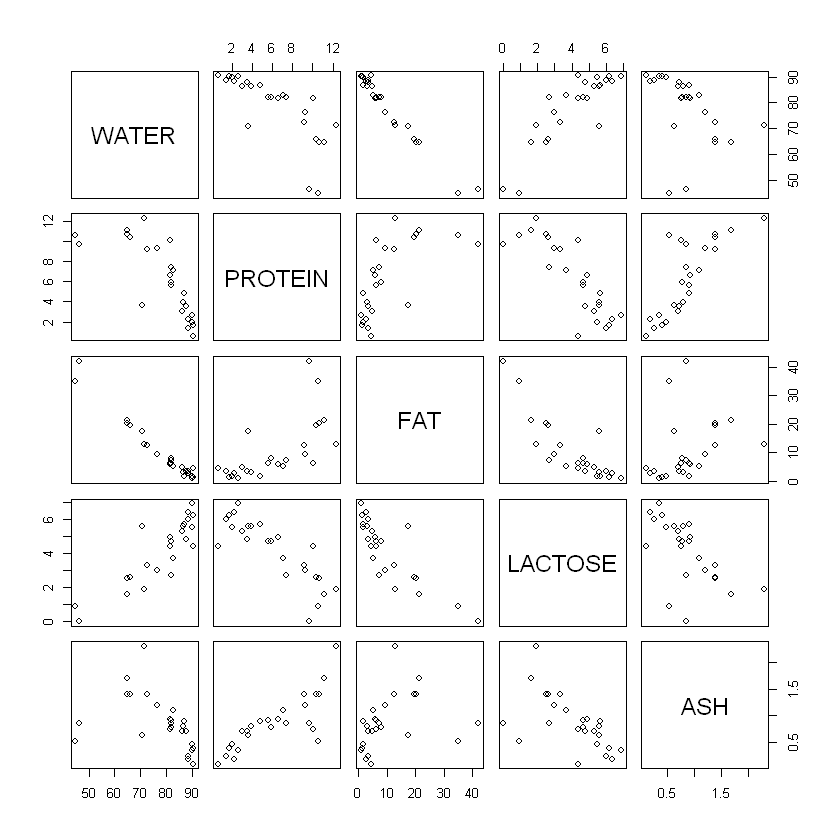

In [3]:
# install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
str(datos)
summary(datos)
plot(datos)

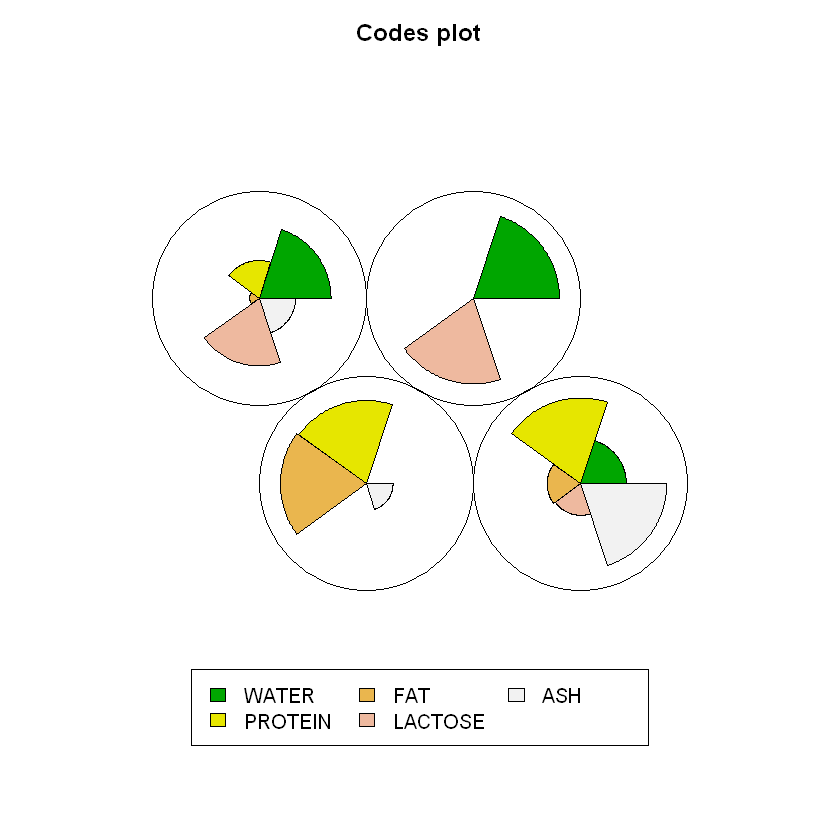

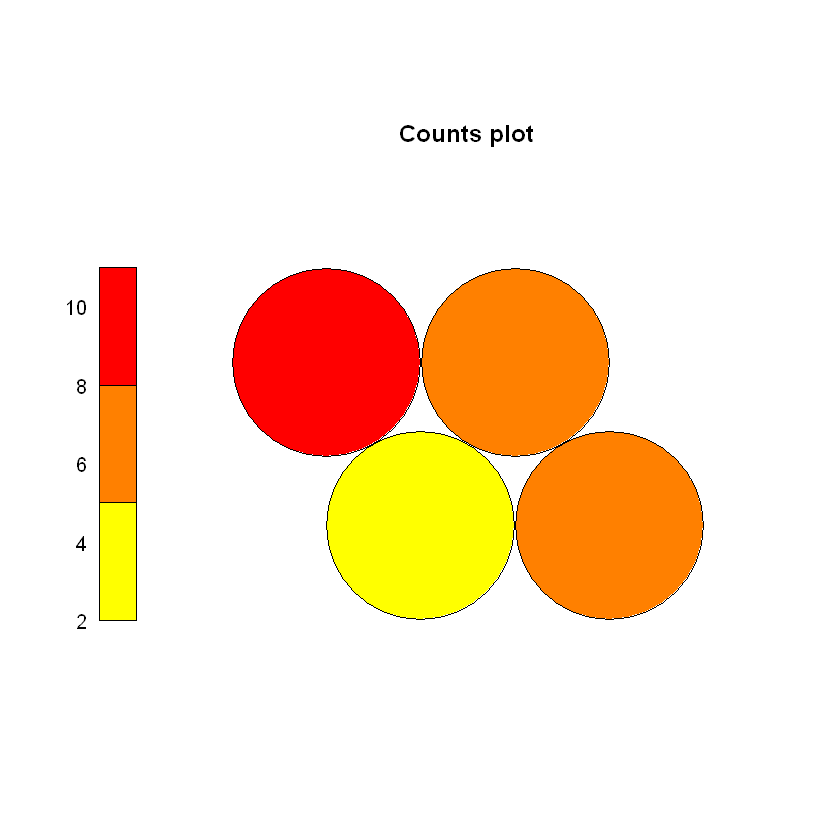

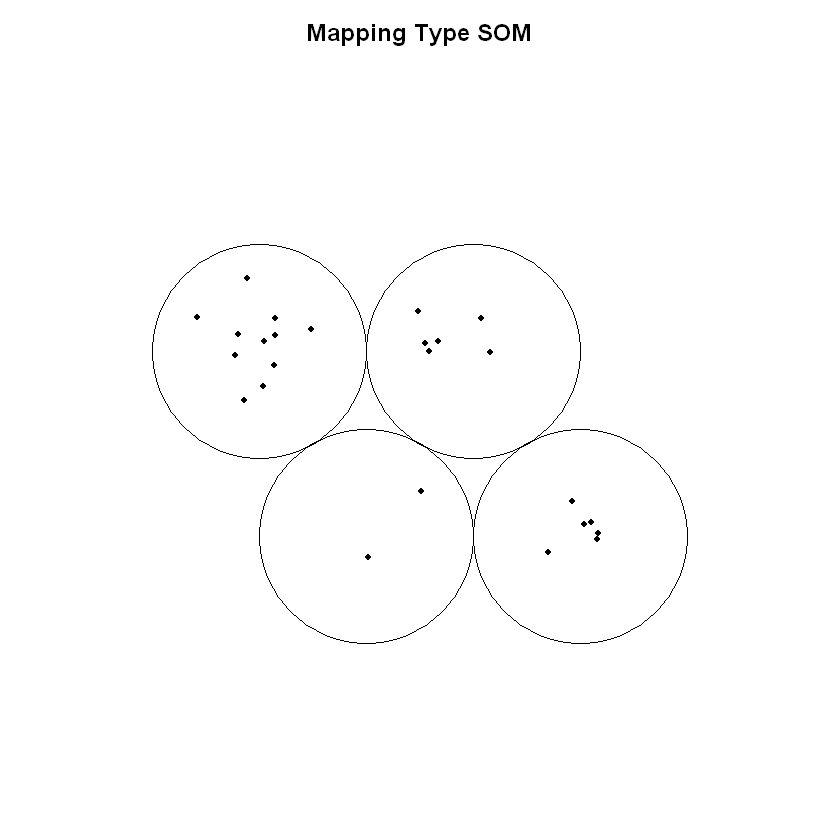

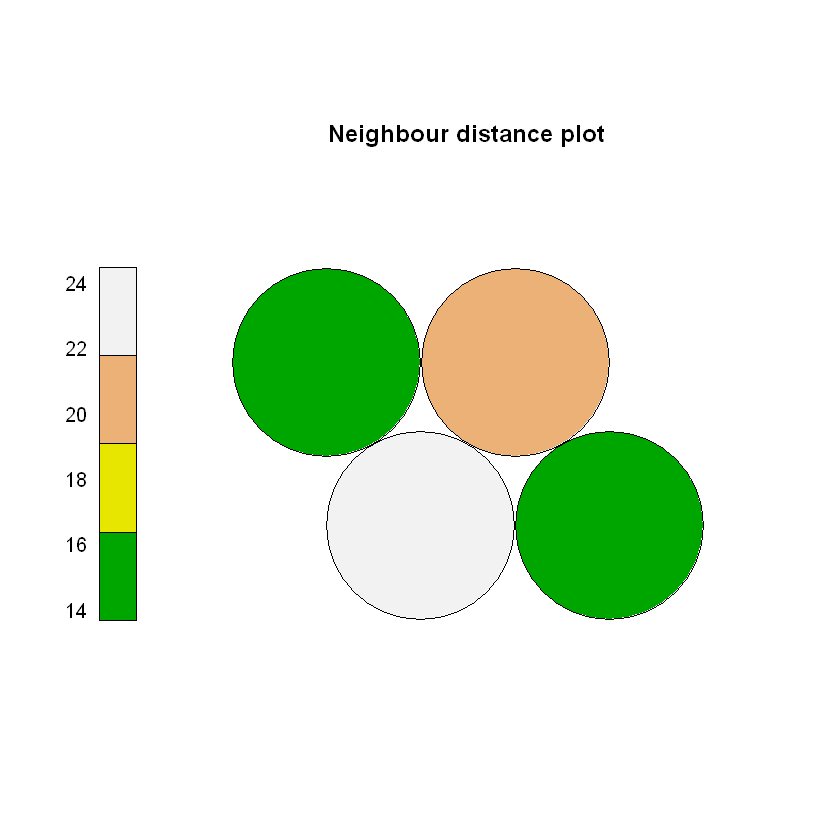

In [4]:
#create SOM grid
# str(datos)
# str(scale(datos))
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

El método som es un wrapper y al fondo usa el método supersom. Como parámetros toma los datos multidimensionales, y un objeto de somgrid, que es una cuadricula con tamaño y forma(topologia) especificado (aquí un cuadricula de 2x2 y topología de hexagono).  
Por defecto el plot usa el argumento “codes”, que enseña los vectores y su cantidad. Los otros tipos de gráficos son los “counts” “mapping” y “dist.neighbours”. Counts enseña el número de objetos mapeados. Mapping enseña donde los objetos están mapeados. Dist.neighbours dice la distancia total entre los vecinos inmediatos. 

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. (Codigo modificado está abajo)

Con una cuadricula con tamaño de solo 2x2, es difícil intrepetar los resultados del SOM. Si cambiamos la cuadricula a tener un tamaño de 5x5 se puede ver mejor el efecto como las cuadriculas agrupan con vecinos similares. Nuestros datos solo tienen pocas entidades, y por eso hay muchos cuadriculas vacías o con pocas entidades. Por eso una cuadricula 3x3 será mejor para nuestro caso.

TODO: mas intrepetacion




[1] "Comparasion entre tamaños de las cuadriculas"


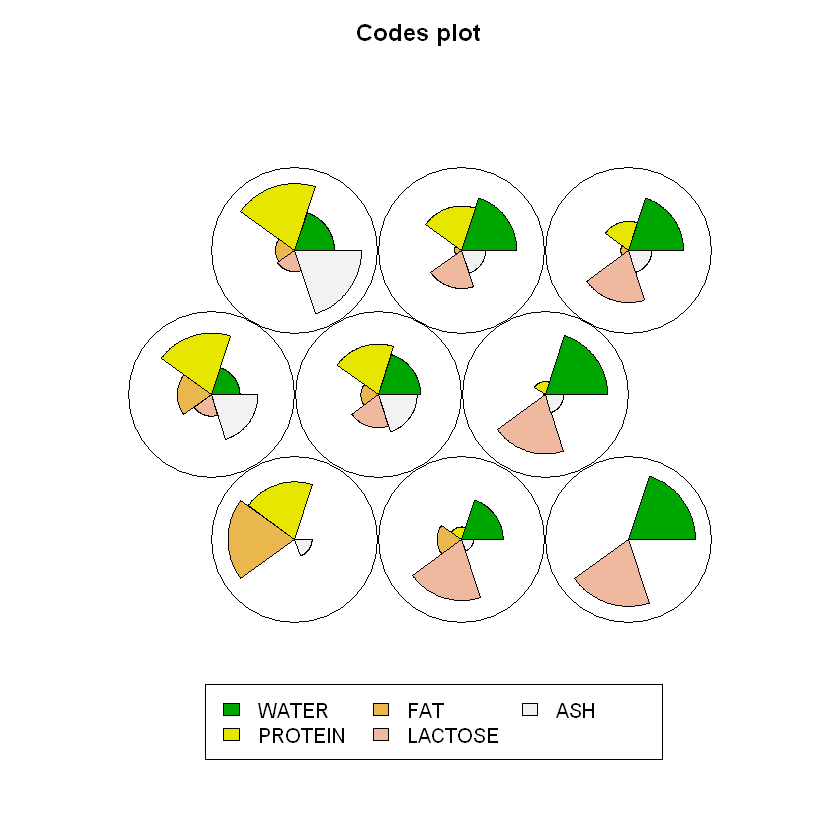

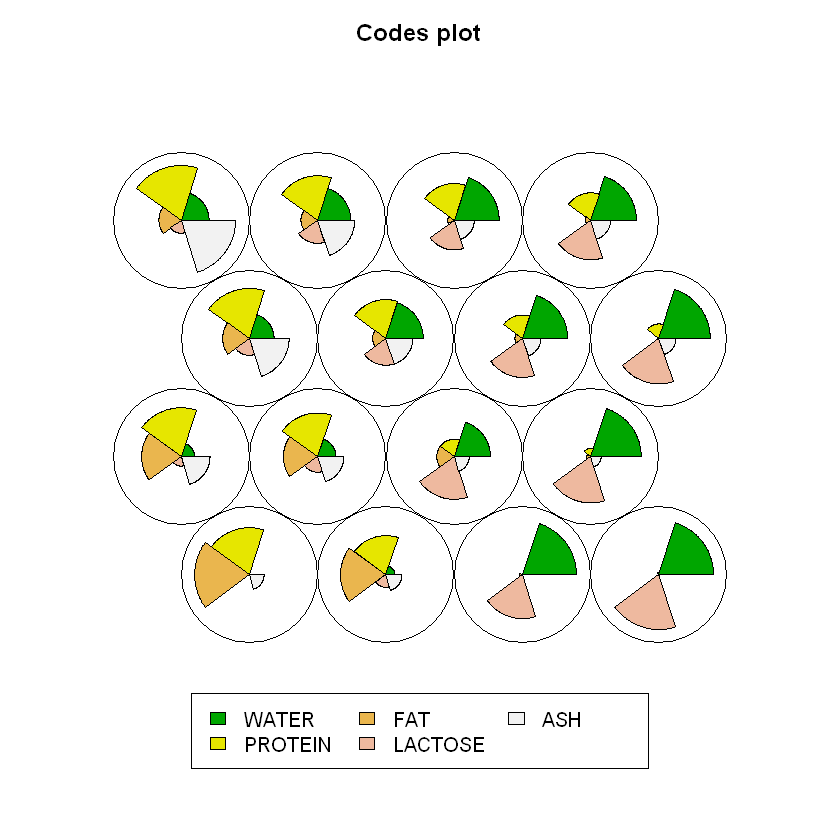

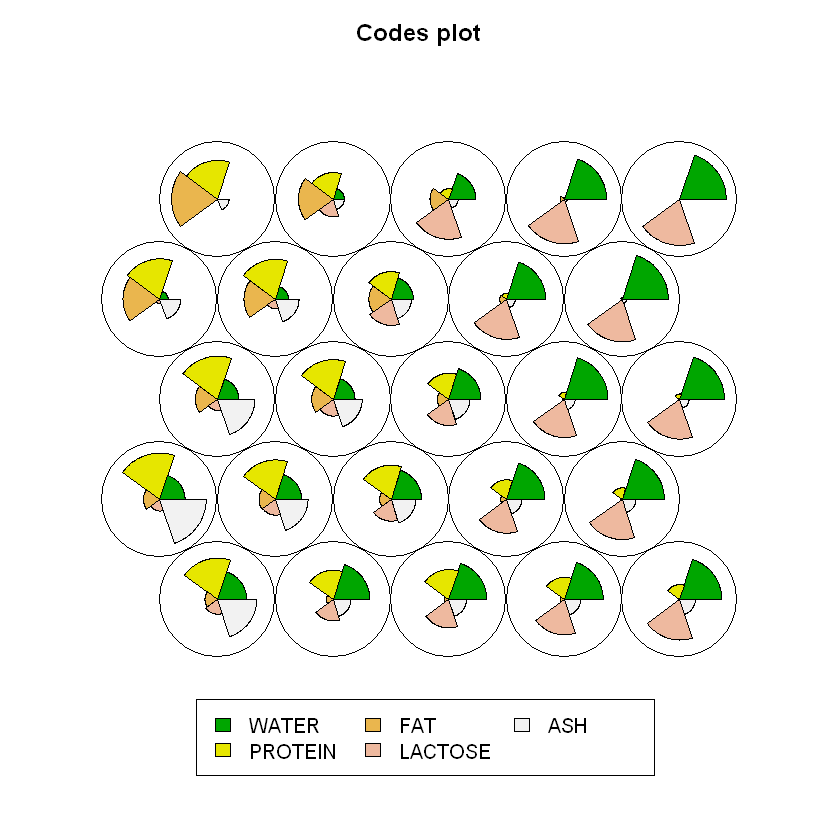

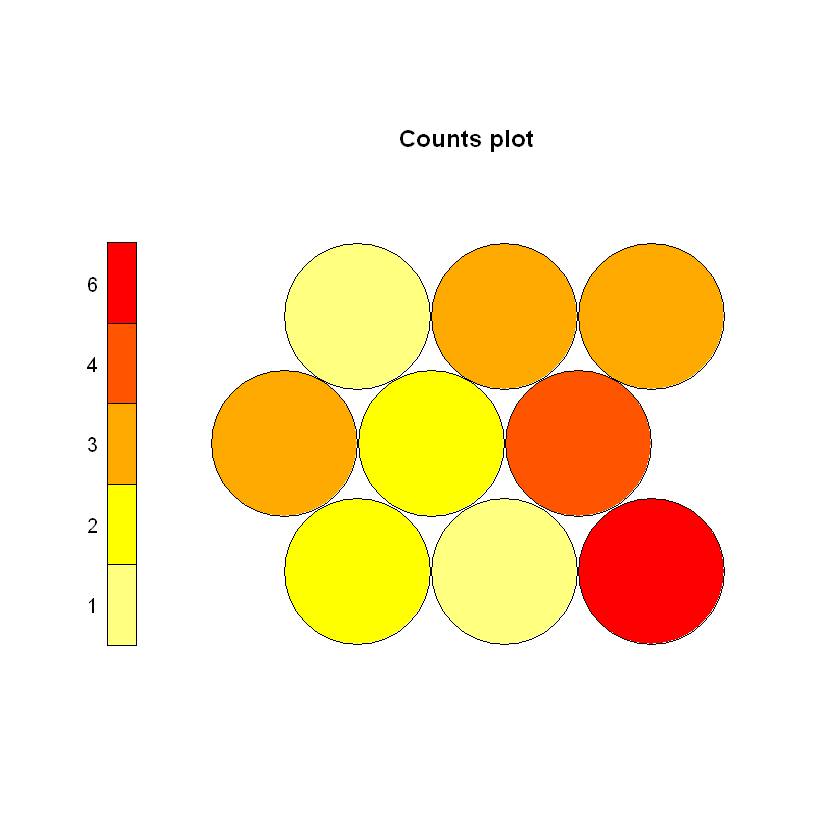

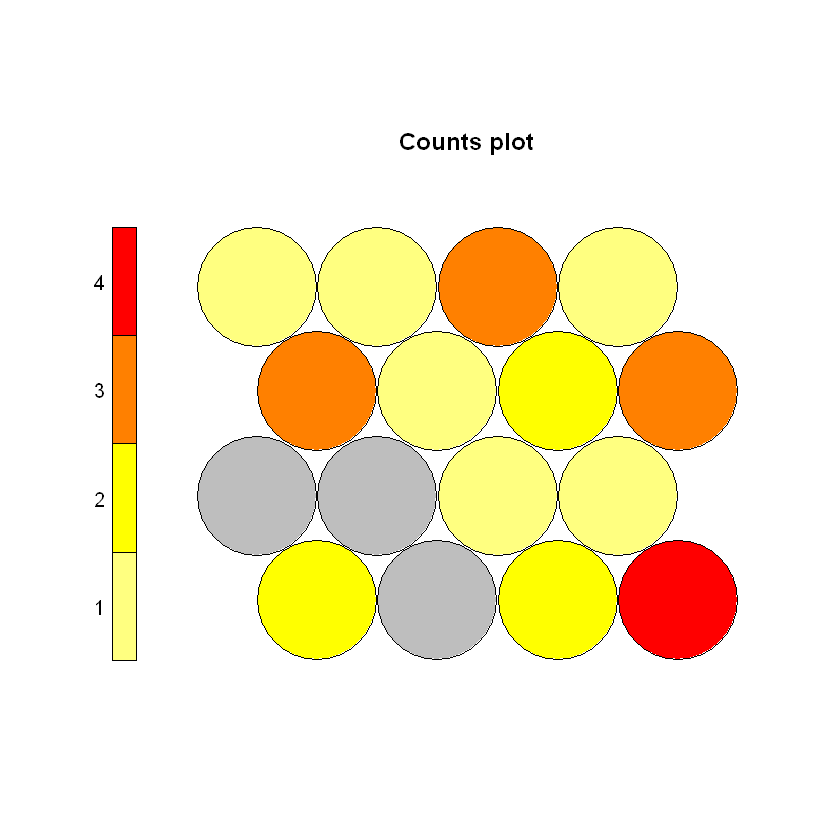

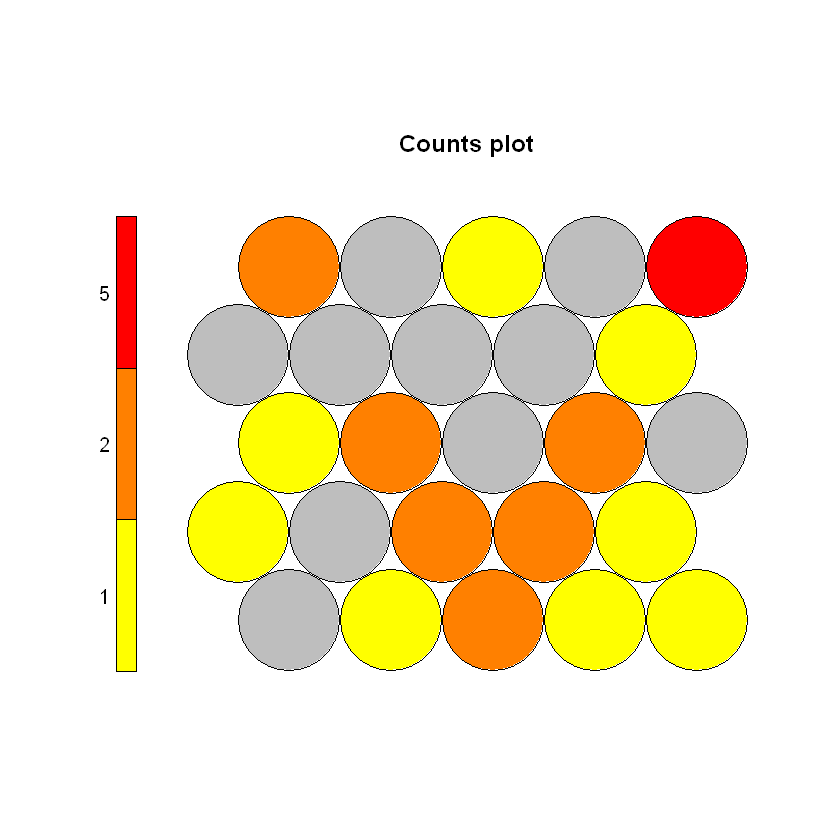

[1] "Comparacion de topografia"


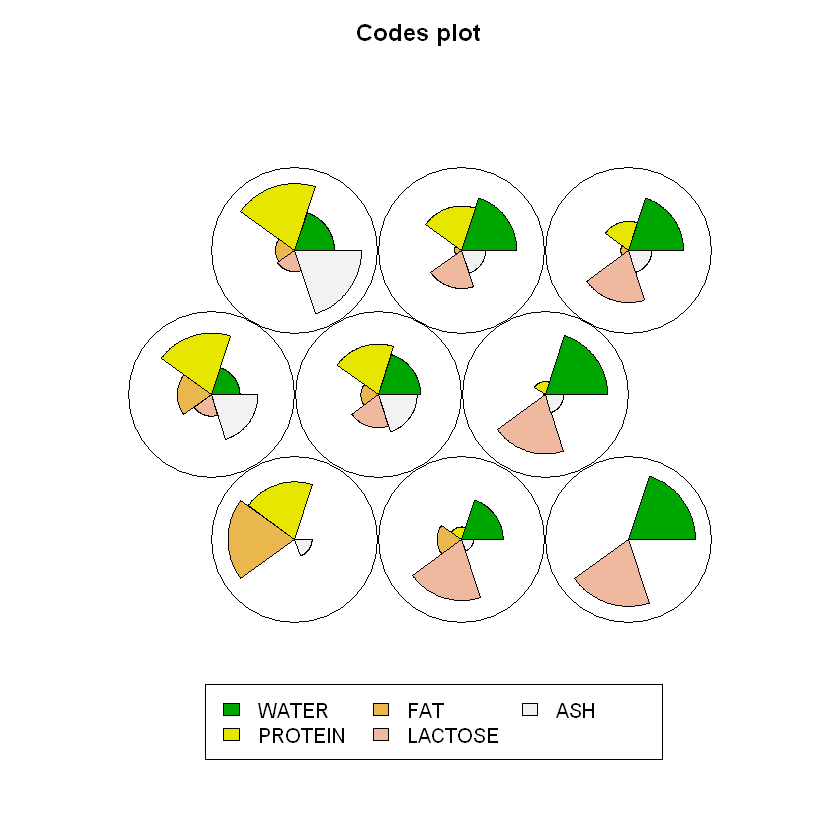

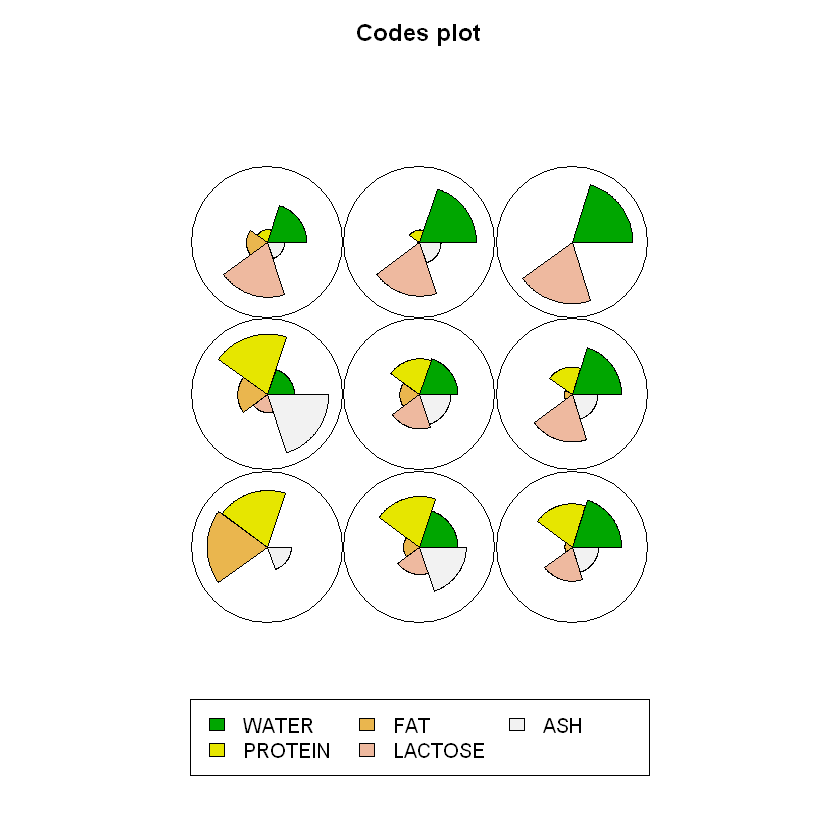

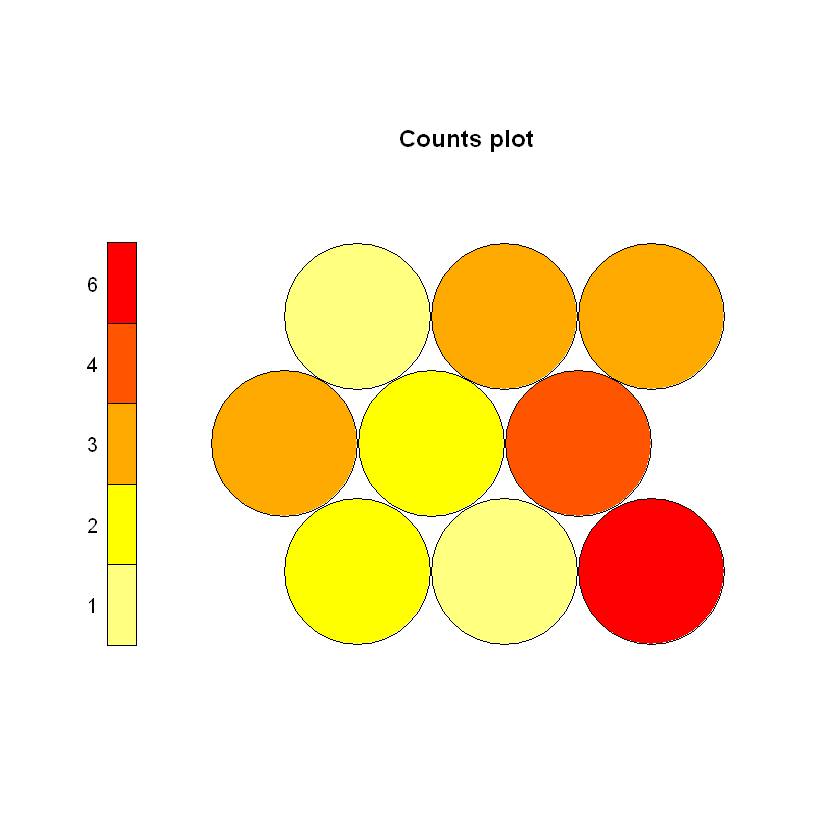

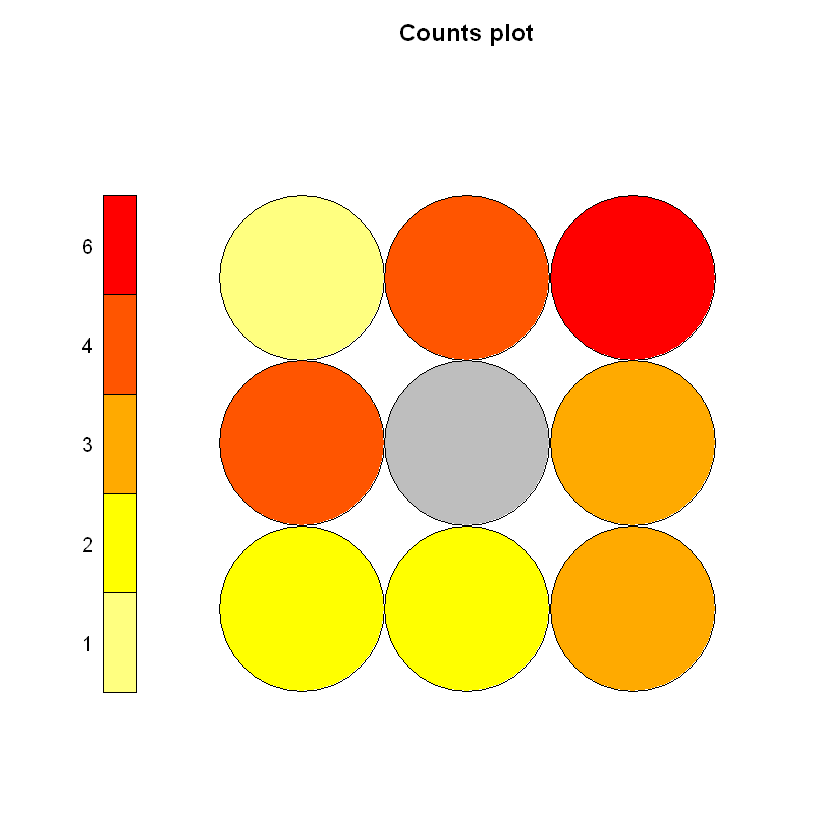

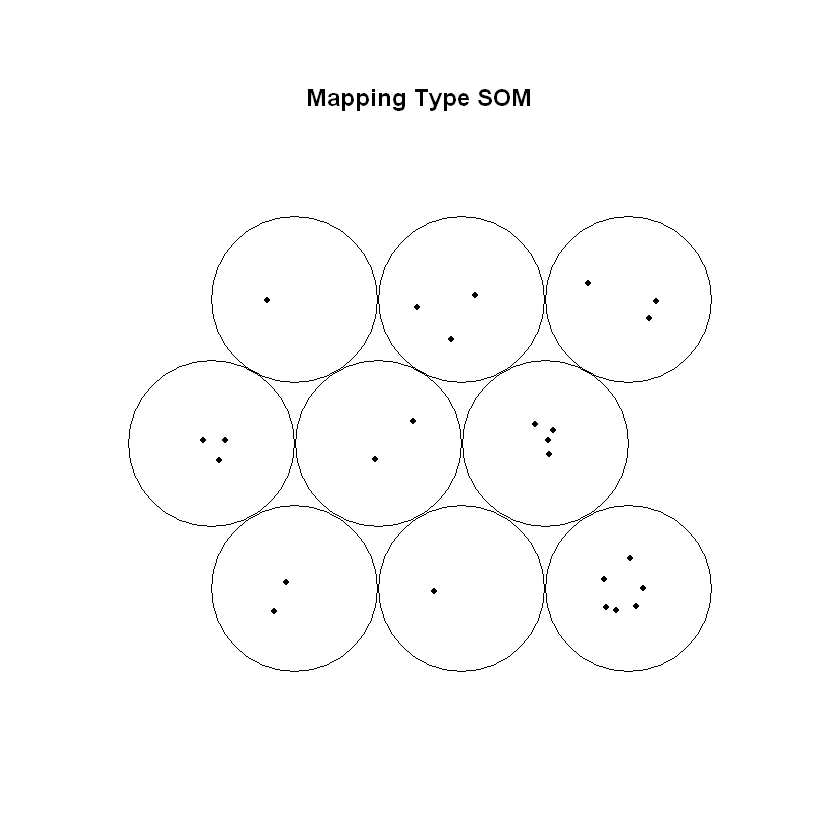

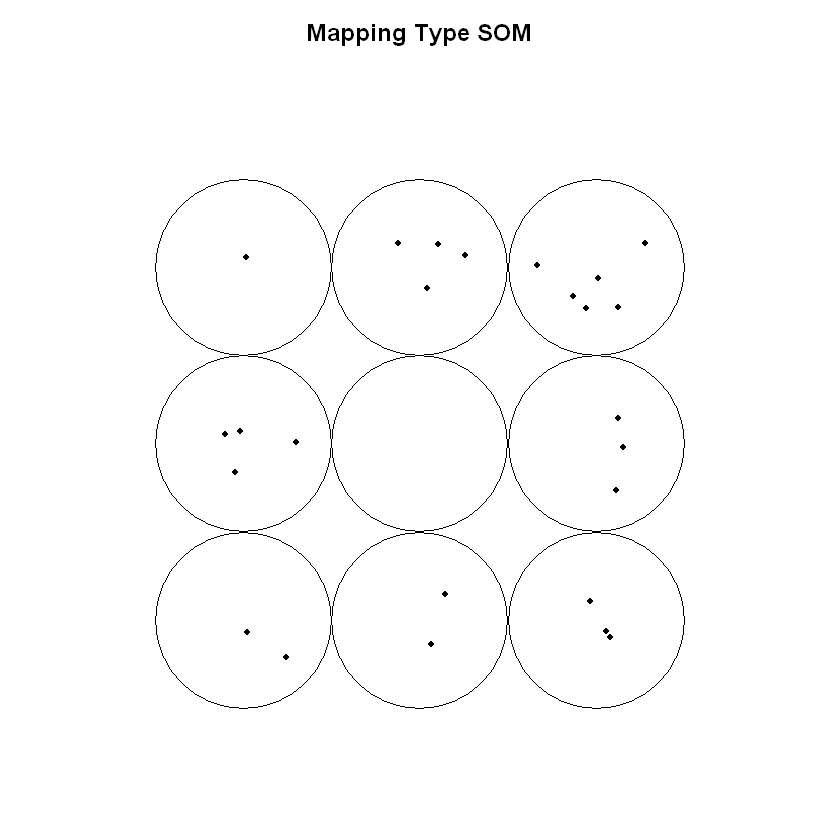

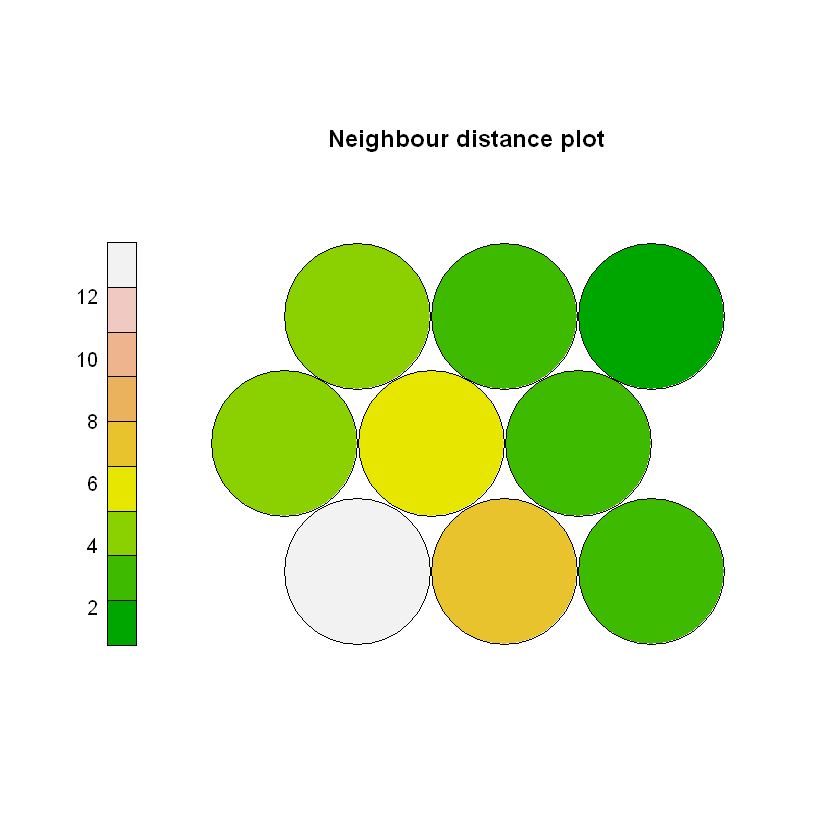

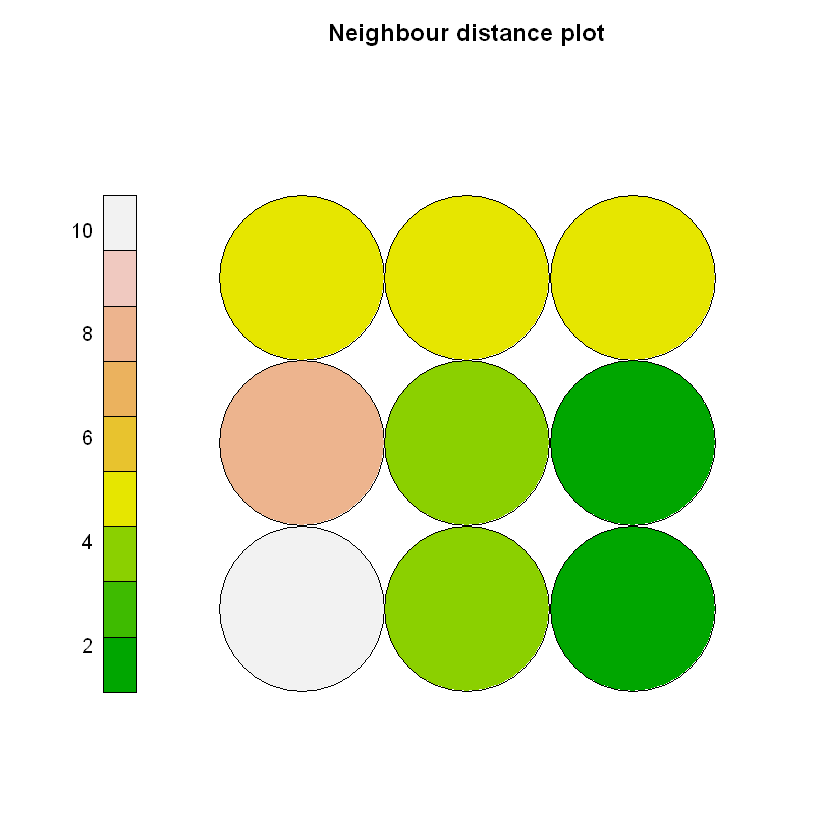

In [5]:
print("Comparasion entre tamaños de las cuadriculas")
sommap <- som(scale(datos), grid = somgrid(3, 3, "hexagonal"))
sommap2 <- som(scale(datos), grid = somgrid(4, 4, "hexagonal"))
sommap3 <- som(scale(datos), grid = somgrid(5, 5, "hexagonal"))
plot(sommap)
plot(sommap2)
plot(sommap3)

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap2, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap3, type = "counts", palette.name = colors, heatkey = TRUE)


sommapRectg <- som(scale(datos), grid = somgrid(3, 3, "rectangular"))
plot(sommap)
print("Comparacion de topografia")
plot(sommapRectg)

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommapRectg, type = "counts", palette.name = colors, heatkey = TRUE)


plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommapRectg, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)
plot(sommapRectg, type = "dist.neighbours", palette.name = terrain.colors)

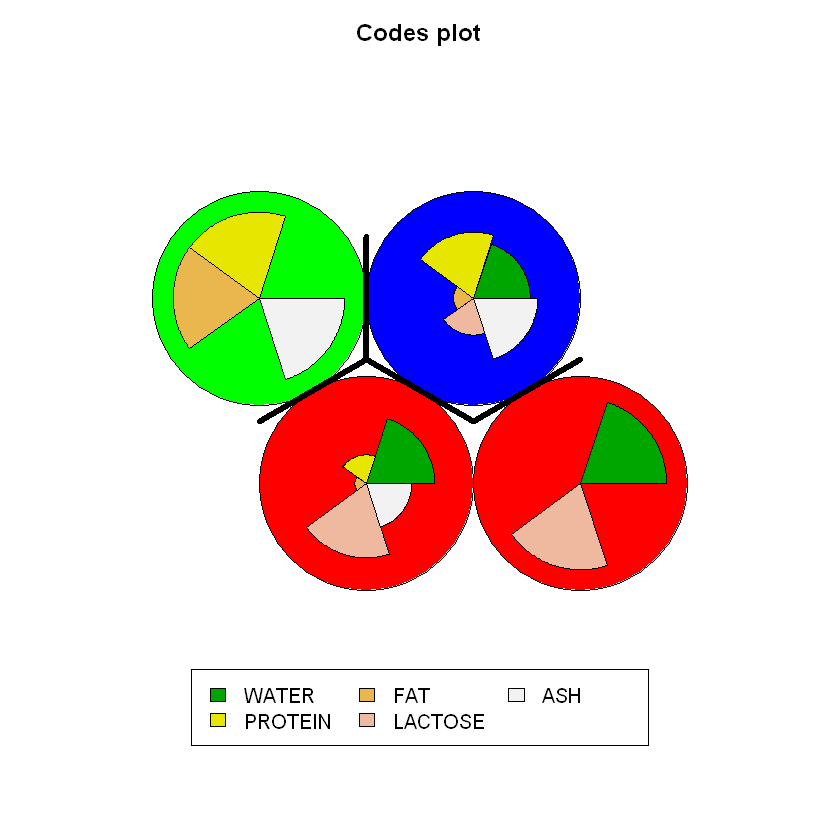

In [6]:
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

Por que SOM genera vectores, se puede calcular la distancia entre cuadriculas. Entonces Hclust los agrupa a 3 grupos.

b) Interprete y comente los resultados obtenidos.

Dos cuadriculas mas similares forman un grupo de 2, en este caso los cuadriculas con mayor cantidad de agua y proteina. 

Ejercicio 3: 

a) De los datos en el archivo comunas.csv escoja un subconjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

Hemos elegido un subconjunto de todas las comunas en Chile con los variables Indice desarollo humano, pobreza y escolaridad. Esto es para analizar la pobreza en chile (TODO: podemos elegir otros variables, no me entere con buena explicion porque seran estos) 

b) Realice las estimaciones, discuta sus resultados y proponga una estrategia gráfica para representarlos.

'data.frame':	323 obs. of  12 variables:
 $ Poblaci.n..miles..2011                     : num  186 18.6 17.3 93.8 3.4 ...
 $ IDSE                                       : num  0.698 0.604 0.591 0.577 0.382 0.717 0.714 0.698 0.697 0.684 ...
 $ Ingreso.per.c.p..Mens..miles....2006.11    : num  228 188 176 166 161 ...
 $ Pobreza...2006.11                          : num  10.2 12.2 9.8 20.9 10 8.5 7.1 6.1 5.8 2.9 ...
 $ Escolaridad..aØos..2006.11                 : num  11.1 9.6 9.7 10.1 7.6 10.9 11 10.9 10.1 9.6 ...
 $ Material.Vivienda.bueno.o.acceptable...2006: num  81.8 71 73.1 65.9 49 85 80.6 77.6 88.6 78.4 ...
 $ Alcantarillado.o.Fosa.S.pt....2006         : num  98.8 94 83.5 98.4 38.9 98.9 99 98.1 99.1 98.4 ...
 $ Esperanza.vida.al.nacer..aØos..2005.10     : num  77.2 77.5 77.3 78.1 81.8 76.2 76.1 72 74.9 73.4 ...
 $ X.ndice.Desarrollo.Humano                  : num  0.631 0.572 0.574 0.555 0.592 0.625 0.627 0.536 0.571 0.548 ...
 $ Tasa.AVPP.x.1000.h.2007.11                 : num  82.1 2

,Poblaci.n..miles..2011,IDSE,Ingreso.per.c.p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
2,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
3,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
4,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
5,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
6,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


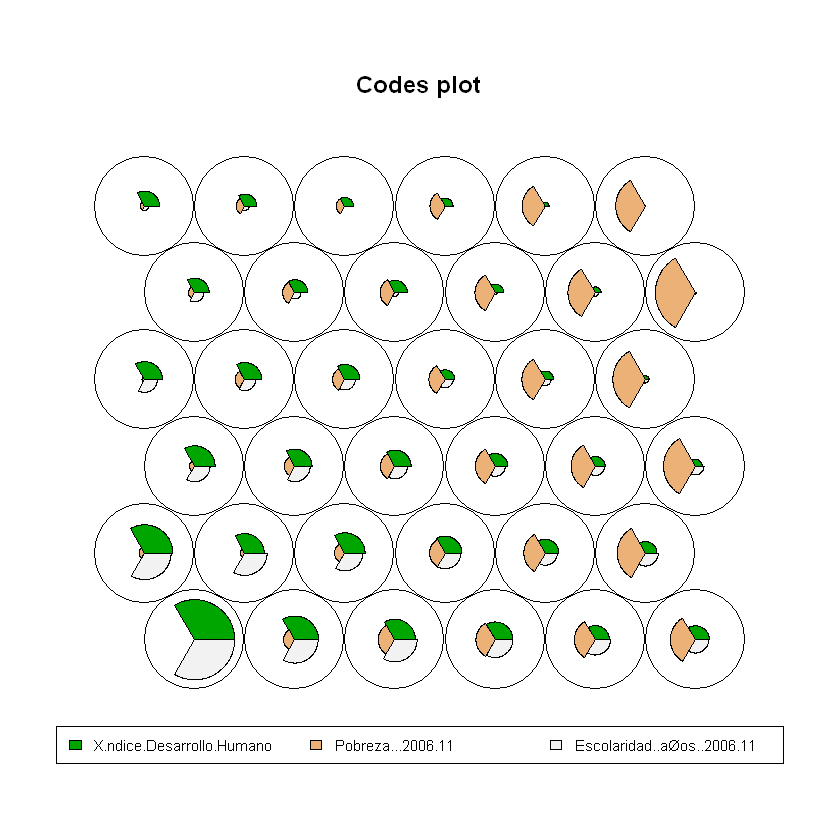

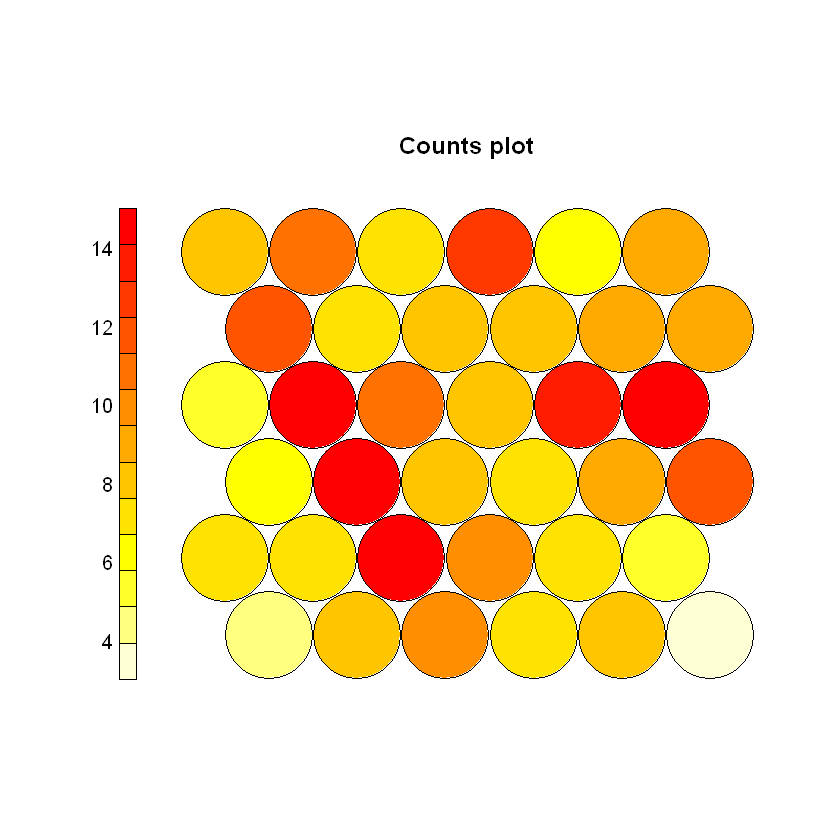

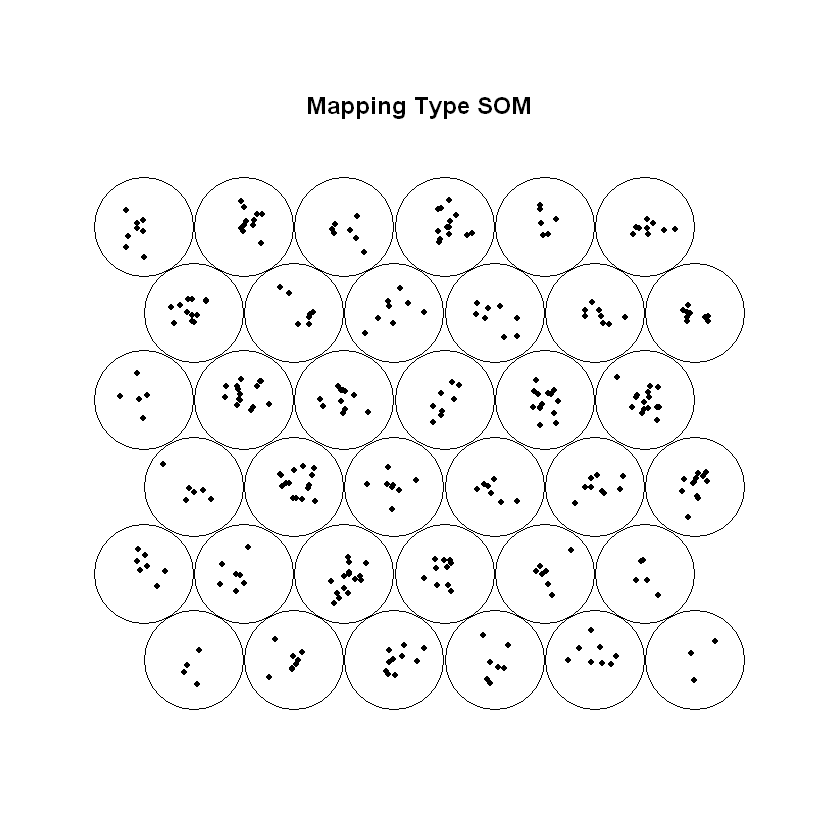

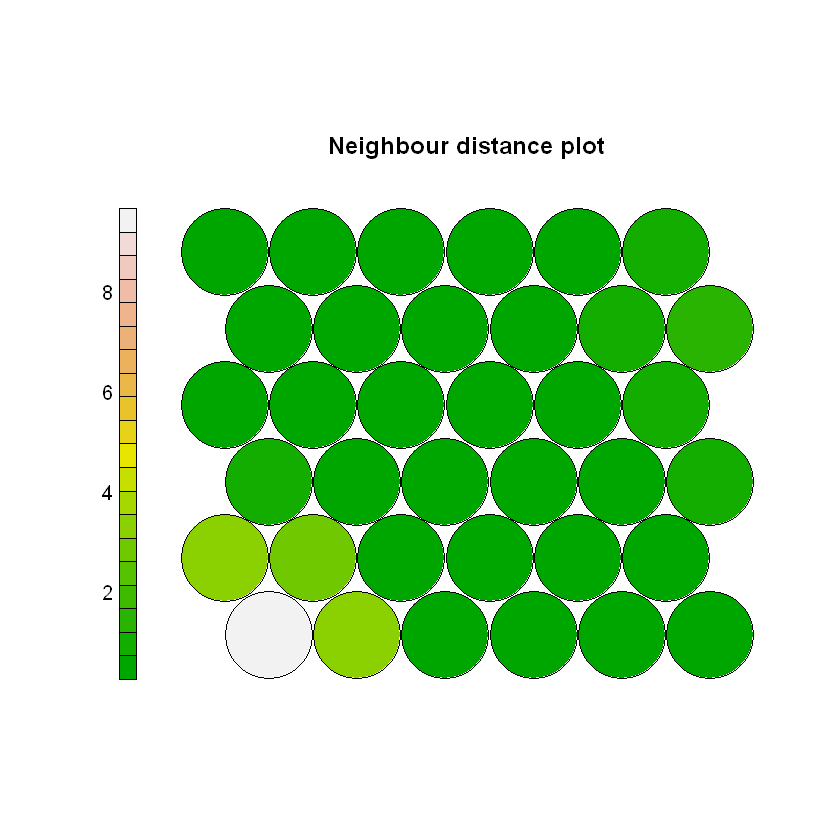

In [27]:
datos<- read.table("comunas.csv",header=TRUE,sep=";",dec=".")
datos <- datos[,-(1:2)]
str(datos) # --> 323 entidades, 12 variables
head(datos)

#Elegir los variables para subconjunto
datos <-datos[c("X.ndice.Desarrollo.Humano","Pobreza...2006.11", "Escolaridad..aØos..2006.11")]

sommap <- som(scale(datos), grid = somgrid(6, 6, "hexagonal"))
plot(sommap)

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

#TODO Agrupamiento, con hclust?